In [3]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**오차 행렬(혼동 행렬) 생성**

In [4]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

[[337  20]
 [ 30 182]]


**정확도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

* 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수
* (TN + TP) / (TN + FP + FN + TP)
* 전체 데이터 중에서 모델이 양성을 양성이라고 제대로 예측하고 음성이 음성이라고 제대로 예측한 비율이 약 0.91임을 의미

In [6]:
accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.9121265377855887


**정밀도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

* 정밀도: 예측을 양성으로 한 대상 중에 예측과 실제 값이 양성으로 일치한 데이터의 비율
* TP / (FP+TP)
* 모델이 양성으로 판단한 데이터 중에 실제로 양성인 데이터의 비율이 약 0.90라는 것을 의미

In [7]:
precision = precision_score(y, y_pred)
print(precision)

0.900990099009901


**재현율의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

* 재현율: 실제 값이 양성인 대상 중에 예측과 실제 값이 양성으로 일치한 비율
* TP /(FN+TP)
* 실제 값이 양성인 데이터들 중에 모델은 약 0.86 정도의 데이터를 양성으로 예측한다는 것을 의미

In [8]:
recall = recall_score(y, y_pred)
print(recall)

0.8584905660377359


**F1 score의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

* F1 스코어: 정밀도와 재현도를 결합한 지표
* 2*{(precision * recall) / (precision + recall)}
* F1 스코어가 약 0.88로 1과 가까운 값이 나왔으므로 모델이 정밀도와 재현율 모두 높은 수준의 성능 균형을 이루고 있다고 볼 수 있다.

In [9]:
f1 = f1_score(y, y_pred)
print(f1)

0.8792270531400966


**예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.**

In [10]:
from sklearn.preprocessing import Binarizer


In [11]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
y_pred_proba = model_lor.predict_proba(X)
pred_proba_1 = y_pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=0.9)
y_pred2 = binarizer.fit_transform(pred_proba_1)

#혼동행렬
conf_matrix2 = confusion_matrix(y, y_pred2)
print(conf_matrix2)

#정확도
accuracy2 = accuracy_score(y, y_pred2)
print(accuracy2)

#정밀도
precision2 = precision_score(y, y_pred2)
print(precision2)

#재현율
recall2 = recall_score(y, y_pred2)
print(recall2)

#f1 score
f1_2 = f1_score(y, y_pred2)
print(f1_2)

[[356   1]
 [ 73 139]]
0.8699472759226714
0.9928571428571429
0.6556603773584906
0.7897727272727273


**ROC 곡선 시각화**

In [14]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y, y_pred_proba[:, 1])

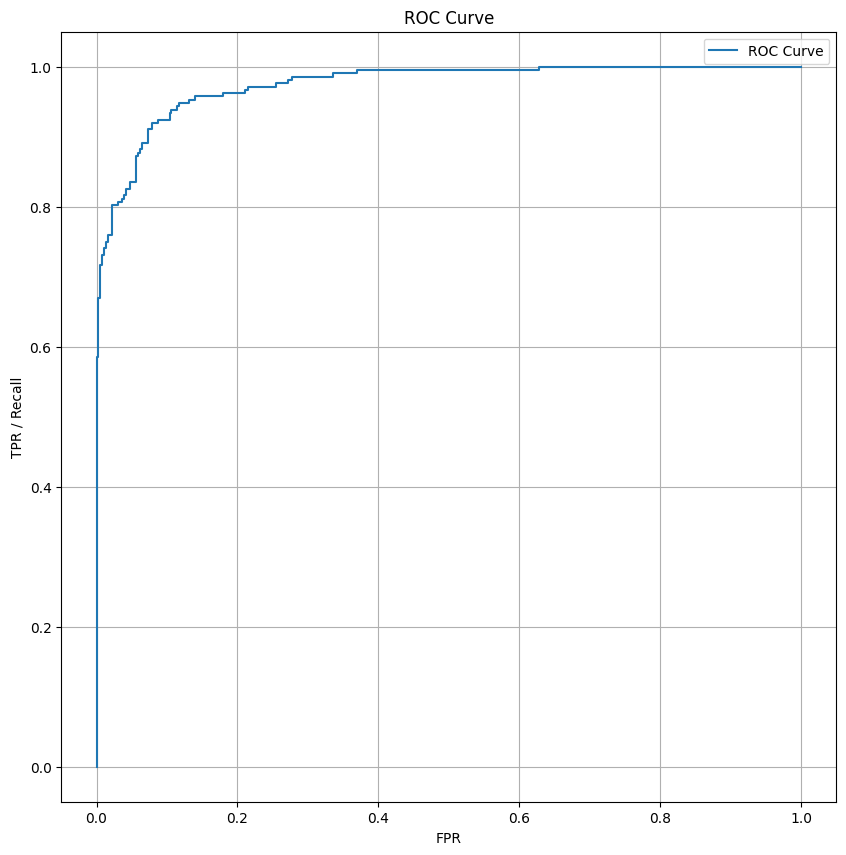

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(fprs, tprs, label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR / Recall')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

**ROC AUC 값을 구하고 해당 값을 통해 알 수 있는 점을 쓰시오.**

약 0.97로 1에 가까우므로 모델이 양성과 음성 클래스를 잘 구분한다고 볼 수 있다.

In [12]:
roc_auc = roc_auc_score(y, y_pred_proba[:, 1])
print(roc_auc)

0.974076423022039
